In [22]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.chdir("../data/aws_predictions/")

# A549

In [4]:
A549_rep5_run1 = pd.read_csv("A549_rep5_run1_prediction.csv")
A549_rep6_run1 = pd.read_csv("A549_rep6_run1_prediction.csv")

In [5]:
merge1 = A549_rep5_run1.merge(A549_rep6_run1, on = ['transcript','position'], how = 'inner')
merge1['mean_scores_A549'] = merge1[['score_x', 'score_y']].mean(axis=1)
merge1["pred_mean_A549"] = merge1.mean_scores_A549.map(lambda x:1 if x>=0.35 else 0)
merge1 = merge1.drop(columns = ['score_x','score_y'],axis=1)
merge1 = merge1[merge1["pred_mean_A549"] == 1]
merge1.head()

,transcript,position,mean_scores_A549,pred_mean_A549
30,ENST00000371582,875,0.570455,1
58,ENST00000002165,589,0.740822,1
139,ENST00000226299,1874,0.381830,1
190,ENST00000002596,1734,0.527273,1
191,ENST00000002596,1779,0.350012,1


# HCT116

In [6]:
Hct116_rep3_run1 = pd.read_csv("Hct116_rep3_run1_prediction.csv")
Hct116_rep3_run4 = pd.read_csv("Hct116_rep3_run4_prediction.csv")
Hct116_rep4_run3 = pd.read_csv("hct116_rep4_run3_prediction.csv")

In [7]:
mergeHct1 = Hct116_rep3_run1.merge(Hct116_rep3_run4, on = ['transcript','position'],how='inner')
mergeHct2 = mergeHct1.merge(Hct116_rep4_run3, on = ['transcript','position'],how='inner')
mergeHct2 = mergeHct2.rename({'score':'score_z'},axis=1)
mergeHct2['mean_scores_Hct'] = mergeHct2[['score_x', 'score_y','score_z']].mean(axis=1)
mergeHct2["pred_mean_Hct"] = mergeHct2.mean_scores_Hct.map(lambda x:1 if x>=0.35 else 0)
mergeHct2 = mergeHct2.drop(columns = ['score_x','score_y','score_z'],axis=1)
mergeHct2 = mergeHct2[mergeHct2["pred_mean_Hct"] == 1]
mergeHct2.head()

,transcript,position,mean_scores_Hct,pred_mean_Hct
30,ENST00000371582,875,0.448485,1
41,ENST00000002165,1445,0.387879,1
58,ENST00000002165,589,0.535606,1
140,ENST00000226299,1882,0.359091,1
184,ENST00000002596,1280,0.363642,1


# HEPG2

In [8]:
hepG2_rep5_run2 = pd.read_csv("hepG2_rep5_run2_prediction.csv")
hepG2_rep6_run1 = pd.read_csv("hepG2_rep6_run1_prediction.csv")

In [9]:
mergeG2 = hepG2_rep5_run2.merge(hepG2_rep6_run1, on = ['transcript','position'],how='inner')
mergeG2['mean_scores_Hep'] = mergeG2[['score_x', 'score_y']].mean(axis=1)
mergeG2["pred_mean_Hep"] = mergeG2.mean_scores_Hep.map(lambda x:1 if x>=0.35 else 0)
mergeG2 = mergeG2.drop(columns = ['score_x','score_y'],axis=1)
mergeG2 = mergeG2[mergeG2["pred_mean_Hep"] == 1]
mergeG2.head()

,transcript,position,mean_scores_Hep,pred_mean_Hep
9,ENST00000373020,936,0.381818,1
30,ENST00000371582,875,0.515909,1
41,ENST00000002165,1445,0.368182,1
58,ENST00000002165,589,0.543182,1
139,ENST00000226299,1874,0.365909,1


# K562

In [10]:
k562_rep4_run1 = pd.read_csv("k562_rep4_run1_prediction.csv")
k562_rep5_run1 = pd.read_csv("k562_rep5_run1_prediction.csv")
k562_rep6_run1 = pd.read_csv("k562_rep6_run1_prediction.csv")

In [11]:
mergek562_1 = k562_rep4_run1.merge(k562_rep5_run1, on = ['transcript','position'],how='inner')
mergek562_2 = mergek562_1.merge(k562_rep6_run1, on = ['transcript','position'],how='inner')
mergek562_2 = mergek562_2.rename({'score':'score_z'},axis=1)
mergek562_2['mean_scores_K562'] = mergek562_2[['score_x', 'score_y','score_z']].mean(axis=1)
mergek562_2["pred_mean_K562"] = mergek562_2.mean_scores_K562.map(lambda x:1 if x>=0.35 else 0)
mergek562_2 = mergek562_2.drop(columns = ['score_x','score_y','score_z'],axis=1)
mergek562_2 = mergek562_2[mergek562_2["pred_mean_K562"] == 1]
mergek562_2.head()

,transcript,position,mean_scores_K562,pred_mean_K562
17,ENST00000371582,875,0.353030,1
28,ENST00000002165,1445,0.398485,1
45,ENST00000002165,589,0.637762,1
227,ENST00000000412,2440,0.565152,1
232,ENST00000000412,2580,0.518182,1


# MCF7

In [12]:
mcf7_rep3_run1 = pd.read_csv("mcf7_rep3_run1_prediction.csv")
mcf7_rep4_run1 = pd.read_csv("mcf7_rep4_run1_prediction.csv")

In [13]:
mergemcf7 = mcf7_rep3_run1.merge(mcf7_rep4_run1, on = ['transcript','position'],how='inner')
mergemcf7['mean_scores_MCF7'] = mergemcf7[['score_x', 'score_y']].mean(axis=1)
mergemcf7["pred_mean_MCF7"] = mergemcf7.mean_scores_MCF7.map(lambda x:1 if x>=0.35 else 0)
mergemcf7 = mergemcf7.drop(columns = ['score_x','score_y'],axis=1)
mergemcf7 = mergemcf7[mergemcf7["pred_mean_MCF7"] == 1]
mergemcf7.head()

,transcript,position,mean_scores_MCF7,pred_mean_MCF7
30,ENST00000371582,875,0.522727,1
41,ENST00000002165,1445,0.404545,1
58,ENST00000002165,589,0.559091,1
258,ENST00000000412,2440,0.559091,1
263,ENST00000000412,2580,0.468182,1


In [14]:
all_cells = [merge1, mergeG2, mergeHct2, mergek562_2, mergemcf7]
all_cells_df = pd.concat(all_cells, axis=1)

# A549 vs Others

In [15]:
##compare how many number of cancer cell with same transcript and position in A549 and Hep
A549_with_Hep_cell = [merge1,mergeG2]
A549_with_Hep_cell_df = pd.concat(A549_with_Hep_cell,axis=1)
A549_with_Hep_cell_df = A549_with_Hep_cell_df.dropna()
len(A549_with_Hep_cell_df)

139

In [16]:
A549_with_Hct_cell = [merge1,mergeHct2]
A549_with_Hct_cell_df = pd.concat(A549_with_Hct_cell,axis=1)
A549_with_Hct_cell_df = A549_with_Hct_cell_df.dropna()
len(A549_with_Hct_cell_df)

183

In [17]:
A549_with_K562_cell = [merge1,mergek562_2]
A549_with_K562_cell_df = pd.concat(A549_with_K562_cell,axis=1)
A549_with_K562_cell_df = A549_with_K562_cell_df.dropna()
len(A549_with_K562_cell_df)

87

In [18]:
A549_with_MCF7_cell = [merge1,mergemcf7]
A549_with_MCF7_cell_df = pd.concat(A549_with_MCF7_cell,axis=1)
A549_with_MCF7_cell_df = A549_with_MCF7_cell_df.dropna()
len(A549_with_MCF7_cell_df)

166

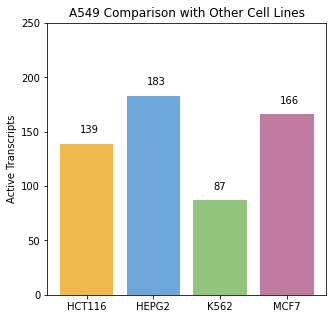

In [29]:
ind_a549 = ["HCT116", "HEPG2", "K562", "MCF7"]
x_pos = np.arange(4)
a549_ls = [len(A549_with_Hep_cell_df), len(A549_with_Hct_cell_df),
            len(A549_with_K562_cell_df), len(A549_with_MCF7_cell_df)]


colour_scheme = {"A549": "#f75f4f", "HCT116": "#efb94b", "HEPG2": "#6fa8dc", "K562": "#93c47d", "MCF7": "#c27ba0ff"}
plt.figure(figsize = (5, 5))
plt.bar(x_pos, a549_ls, color = [colour_scheme["HCT116"], colour_scheme["HEPG2"], colour_scheme["K562"], colour_scheme["MCF7"]])

plt.xticks(x_pos, ind_a549)
plt.ylabel("Active Transcripts")
plt.ylim([0, 250])
plt.gca().xaxis.set_tick_params(rotation = 0)
plt.title("A549 Comparison with Other Cell Lines")

for index, value in enumerate(a549_ls):
    plt.text(index - 0.1, value + 10, str(value))
 
plt.show()

# HCT vs Others

In [34]:
A549_with_Hct_cell = [merge1,mergeHct2]
A549_with_Hct_cell_df = pd.concat(A549_with_Hct_cell,axis=1)
A549_with_Hct_cell_df = A549_with_Hct_cell_df.dropna()
len(A549_with_Hct_cell_df)

183

In [30]:
Hct_with_Hep = [mergeHct2,mergeG2]
Hct_with_Hep_df = pd.concat(Hct_with_Hep,axis=1)
Hct_with_Hep_df = Hct_with_Hep_df.dropna()
len(Hct_with_Hep_df)

155

In [32]:
Hct_with_K562 = [mergeHct2,mergek562_2]
Hct_with_K562_df = pd.concat(Hct_with_K562,axis=1)
Hct_with_K562_df = Hct_with_K562_df.dropna()
len(Hct_with_K562)

2

In [33]:
Hct_with_MCF7 = [mergeHct2,mergemcf7]
Hct_with_MCF7_df = pd.concat(Hct_with_MCF7,axis=1)
Hct_with_MCF7_df = Hct_with_MCF7_df.dropna()
len(Hct_with_MCF7_df)

199

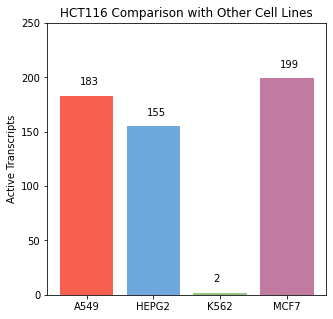

In [35]:
ind_hct = ["A549", "HEPG2", "K562", "MCF7"]
x_pos = np.arange(4)
hct_ls = [len(A549_with_Hct_cell_df), len(Hct_with_Hep_df),
            len(Hct_with_K562), len(Hct_with_MCF7_df)]


colour_scheme = {"A549": "#f75f4f", "HCT116": "#efb94b", "HEPG2": "#6fa8dc", "K562": "#93c47d", "MCF7": "#c27ba0ff"}
plt.figure(figsize = (5, 5))
plt.bar(x_pos, hct_ls, color = [colour_scheme["A549"], colour_scheme["HEPG2"], colour_scheme["K562"], colour_scheme["MCF7"]])

plt.xticks(x_pos, ind_hct)
plt.ylabel("Active Transcripts")
plt.ylim([0, 250])
plt.gca().xaxis.set_tick_params(rotation = 0)
plt.title("HCT116 Comparison with Other Cell Lines")

for index, value in enumerate(hct_ls):
    plt.text(index - 0.1, value + 10, str(value))
 
plt.show()

# HEPG2 vs Others

In [36]:
##time to compare for HepG2
A549_with_Hep_cell = [merge1,mergeG2]
A549_with_Hep_cell_df = pd.concat(A549_with_Hep_cell,axis=1)
A549_with_Hep_cell_df = A549_with_Hep_cell_df.dropna()
len(A549_with_Hep_cell_df)

139

In [37]:
Hct_with_Hep = [mergeHct2,mergeG2]
Hct_with_Hep_df = pd.concat(Hct_with_Hep,axis=1)
Hct_with_Hep_df = Hct_with_Hep_df.dropna()
len(Hct_with_Hep_df)

155

In [38]:
Hep_with_K562 = [mergeG2,mergek562_2]
Hep_with_K562_df = pd.concat(Hep_with_K562,axis=1)
Hep_with_K562_df = Hep_with_K562_df.dropna()
len(Hep_with_K562_df)

103

In [39]:
Hep_with_MCF7 = [mergeG2,mergemcf7]
Hep_with_MCF7_df = pd.concat(Hep_with_MCF7,axis=1)
Hep_with_MCF7_df = Hep_with_MCF7_df.dropna()
len(Hep_with_MCF7_df)

167

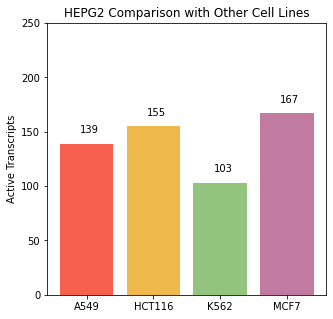

In [40]:
ind_hep = ["A549", "HCT116", "K562", "MCF7"]
x_pos = np.arange(4)
hep_ls = [len(A549_with_Hep_cell_df), len(Hct_with_Hep_df),
            len(Hep_with_K562_df), len(Hep_with_MCF7_df)]


colour_scheme = {"A549": "#f75f4f", "HCT116": "#efb94b", "HEPG2": "#6fa8dc", "K562": "#93c47d", "MCF7": "#c27ba0ff"}
plt.figure(figsize = (5, 5))
plt.bar(x_pos, hep_ls, color = [colour_scheme["A549"], colour_scheme["HCT116"], colour_scheme["K562"], colour_scheme["MCF7"]])

plt.xticks(x_pos, ind_hep)
plt.ylabel("Active Transcripts")
plt.ylim([0, 250])
plt.gca().xaxis.set_tick_params(rotation = 0)
plt.title("HEPG2 Comparison with Other Cell Lines")

for index, value in enumerate(hep_ls):
    plt.text(index - 0.1, value + 10, str(value))
 
plt.show()

# K562 vs Others

In [41]:
##K562 comparison
A549_with_K562_cell = [merge1,mergek562_2]
A549_with_K562_cell_df = pd.concat(A549_with_K562_cell,axis=1)
A549_with_K562_cell_df = A549_with_K562_cell_df.dropna()
len(A549_with_K562_cell_df)

87

In [42]:
Hct_with_K562 = [mergeHct2,mergek562_2]
Hct_with_K562_df = pd.concat(Hct_with_K562,axis=1)
Hct_with_K562_df = Hct_with_K562_df.dropna()
len(Hct_with_K562_df)

109

In [43]:
Hep_with_K562 = [mergeG2,mergek562_2]
Hep_with_K562_df = pd.concat(Hep_with_K562,axis=1)
Hep_with_K562_df = Hep_with_K562_df.dropna()
len(Hep_with_K562_df)

103

In [44]:
K562_with_MCF7 = [mergek562_2,mergemcf7]
K562_with_MCF7_df = pd.concat(K562_with_MCF7,axis=1)
K562_with_MCF7_df = K562_with_MCF7_df.dropna()
len(K562_with_MCF7_df)

117

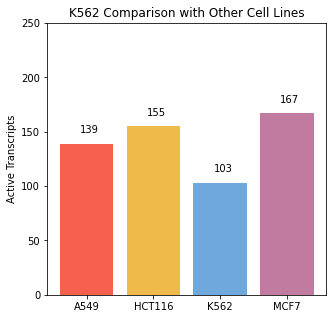

In [45]:
ind_k562 = ["A549", "HCT116", "HEPG2", "MCF7"]
x_pos = np.arange(4)
k562_ls = [len(A549_with_K562_cell_df), len(Hct_with_K562_df),
            len(Hep_with_K562_df), len(K562_with_MCF7_df)]


colour_scheme = {"A549": "#f75f4f", "HCT116": "#efb94b", "HEPG2": "#6fa8dc", "K562": "#93c47d", "MCF7": "#c27ba0ff"}
plt.figure(figsize = (5, 5))
plt.bar(x_pos, hep_ls, color = [colour_scheme["A549"], colour_scheme["HCT116"], colour_scheme["HEPG2"], colour_scheme["MCF7"]])

plt.xticks(x_pos, ind_hep)
plt.ylabel("Active Transcripts")
plt.ylim([0, 250])
plt.gca().xaxis.set_tick_params(rotation = 0)
plt.title("K562 Comparison with Other Cell Lines")

for index, value in enumerate(hep_ls):
    plt.text(index - 0.1, value + 10, str(value))
 
plt.show()

# MCF7 vs Others

In [46]:
##MCF7 comparison
A549_with_MCF7_cell = [merge1,mergemcf7]
A549_with_MCF7_cell_df = pd.concat(A549_with_MCF7_cell,axis=1)
A549_with_MCF7_cell_df = A549_with_MCF7_cell_df.dropna()
len(A549_with_MCF7_cell_df)

166

In [47]:
Hct_with_MCF7 = [mergeHct2,mergemcf7]
Hct_with_MCF7_df = pd.concat(Hct_with_MCF7,axis=1)
Hct_with_MCF7_df = Hct_with_MCF7_df.dropna()
len(Hct_with_MCF7_df)

199

In [48]:
Hep_with_MCF7 = [mergeG2,mergemcf7]
Hep_with_MCF7_df = pd.concat(Hep_with_MCF7,axis=1)
Hep_with_MCF7_df = Hep_with_MCF7_df.dropna()
len(Hep_with_MCF7_df)

167

In [49]:
K562_with_MCF7 = [mergek562_2,mergemcf7]
K562_with_MCF7_df = pd.concat(K562_with_MCF7,axis=1)
K562_with_MCF7_df = K562_with_MCF7_df.dropna()
len(K562_with_MCF7_df)

117

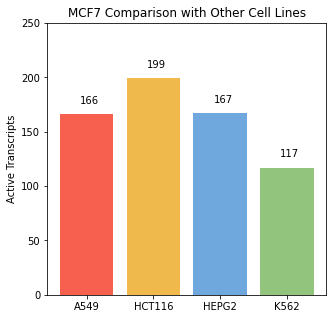

In [50]:
ind_mcf7 = ["A549", "HCT116", "HEPG2", "K562"]
x_pos = np.arange(4)
mcf7_ls = [len(A549_with_MCF7_cell_df), len(Hct_with_MCF7_df),
            len(Hep_with_MCF7_df), len(K562_with_MCF7_df)]


colour_scheme = {"A549": "#f75f4f", "HCT116": "#efb94b", "HEPG2": "#6fa8dc", "K562": "#93c47d", "MCF7": "#c27ba0ff"}
plt.figure(figsize = (5, 5))
plt.bar(x_pos, mcf7_ls, color = [colour_scheme["A549"], colour_scheme["HCT116"], colour_scheme["HEPG2"], colour_scheme["K562"]])

plt.xticks(x_pos, ind_mcf7)
plt.ylabel("Active Transcripts")
plt.ylim([0, 250])
plt.gca().xaxis.set_tick_params(rotation = 0)
plt.title("MCF7 Comparison with Other Cell Lines")

for index, value in enumerate(mcf7_ls):
    plt.text(index - 0.1, value + 10, str(value))
 
plt.show()